# Shaping the Data for usage
# ________________________________________________________________
In this notebook, we will take a deep dive into the dataset we have collected and explore the various features and relationships between them. Understanding the data we're working with is a crucial first step in developing a successful machine learning model, and this notebook is where we begin that process.

Our dataset contains information on over 400,000 used car listings from across the United States. Each listing includes a range of features, such as the car's make and model, year, mileage, and condition. Our goal is to use this information to build a model that can accurately predict the price of a used car based on its features.

In this notebook, we will begin by exploring the distribution of the target variable, which is the price of the used cars in our dataset. We will also examine the relationships between the target variable and other features in the dataset, such as the car's age, mileage, and location.

We will then move on to exploring the individual features themselves, looking at their distributions and any patterns or trends that may emerge. This will help us understand which features may be most useful for predicting the price of a used car.

Throughout this notebook, we will use various visualization techniques to help us better understand the data and identify any outliers or anomalies. By the end of this notebook, we hope to have gained a deep understanding of our dataset and the relationships between its various features, laying the foundation for our machine learning model.

##### Desired outcome:
- Sufficient number of records: The dataset should have enough records to train a machine learning model effectively. In general, the more records you have, the better your model can learn from the data.

- Relevant features: The dataset should include relevant features (i.e., variables) that are likely to be important predictors of the target variable. The features should also be in a format that can be easily processed by machine learning algorithms.

- Minimal missing data: The dataset should have minimal missing data. Missing data can cause problems when training a machine learning model and can result in biased or inaccurate predictions.

- Minimal noise/outliers: The dataset should have minimal noise and outliers. Noise refers to random errors or variations in the data, while outliers are extreme values that lie far from the majority of the data points. Both noise and outliers can negatively affect the accuracy of a machine learning model.

# _______________________________________________________________


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n1 = plt.cm.cividis(np.linspace(0.2, 1.6, 10))
n2 = plt.cm.viridis(np.linspace(0.2, 0.8, 10))
c1 = plt.cm.twilight_shifted(np.linspace(0.2, 1.2, 30))
c2 = plt.cm.Greys(np.linspace(0.5, 2, 20))
b1 = ['Orange', 'Grey']
b2 = ['Grey', 'Orange']

In [3]:
car_data = pd.read_csv("vehicles.csv")

# 
# Column Selection
**___________________________________________________________________________________________________________________________**

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

The columns being **dropped** - reasons are:

- county - null
* size - too many missing
+ cylinders - too many missing
- condition - too many missing
* posting_date - irrelevant
+ VIN - too many missing
* id - irrelevant
- url - irrelevant
* state - lat, long gives numerical values immediately
+ region - -//-
- region_url - irrelevant
* image_url - irrelevant
+ title_status - NaN
- description - irrelevant (for this project, NLP opportunities do exist :D )



In [5]:
car_data.drop(columns = ['county', 'size', 'cylinders', 'condition', 'posting_date', 'VIN', 'id', 'url', 'state', 'region', 'region_url', 'image_url', 'title_status', 'description'], inplace=True)

In [6]:
car_data.dropna(inplace=True)

## A Look at the Data

In [7]:
car_data.head(20)

,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,lat,long
31,15000,2013.0,ford,f-150 xlt,gas,128000.0,automatic,rwd,truck,black,32.592000,-85.518900
32,27990,2012.0,gmc,sierra 2500 hd extended cab,gas,68696.0,other,4wd,pickup,black,32.590000,-85.480000
33,34590,2016.0,chevrolet,silverado 1500 double,gas,29499.0,other,4wd,pickup,silver,32.590000,-85.480000
34,35000,2019.0,toyota,tacoma,gas,43000.0,automatic,4wd,truck,grey,32.601300,-85.443974
35,29990,2016.0,chevrolet,colorado extended cab,gas,17302.0,other,4wd,pickup,red,32.590000,-85.480000
36,38590,2011.0,chevrolet,corvette grand sport,gas,30237.0,other,rwd,other,red,32.590000,-85.480000
38,32990,2017.0,jeep,wrangler unlimited sport,gas,30041.0,other,4wd,other,silver,32.590000,-85.480000
40,30990,2016.0,chevrolet,colorado crew cab z71,other,34940.0,other,4wd,pickup,blue,32.590000,-85.480000
42,37990,2016.0,chevrolet,camaro ss coupe 2d,gas,9704.0,other,rwd,coupe,red,32.590000,-85.480000
45,27990,2018.0,nissan,frontier crew cab pro-4x,gas,37332.0,other,4wd,pickup,silver,32.590000,-85.480000


#
# Price
**___________________________________________________________________________________________________________________________**

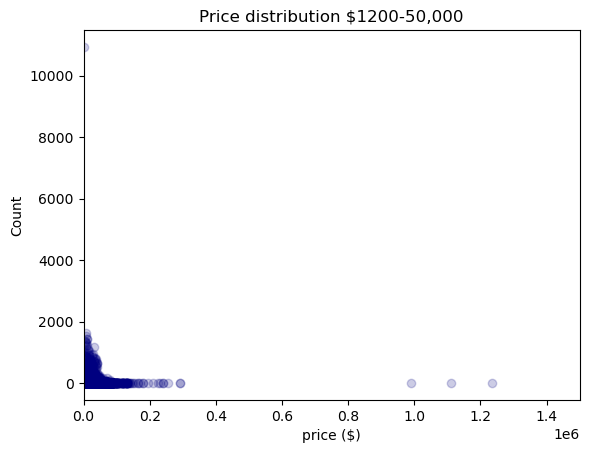

<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(car_data.price.value_counts(), 'o', color='navy', alpha=0.2)
plt.title('Price distribution $1200-50,000')
plt.ylabel('Count')
plt.xlabel('price ($)')
plt.xlim(0, 1500000)
plt.show()
plt.clf()

## Outlier removal

In [9]:
car_data = car_data.loc[car_data['price']>1200]
car_data = car_data.loc[car_data['price']<300000]

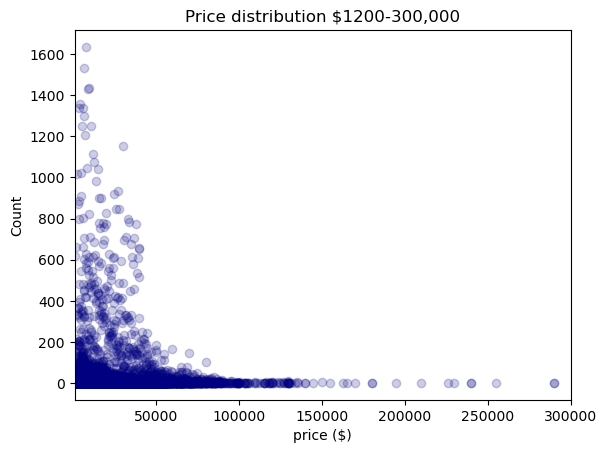

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(car_data.price.value_counts(), 'o', color='navy', alpha=0.2)
plt.title('Price distribution $1200-300,000')
plt.ylabel('Count')
plt.xlabel('price ($)')
plt.xlim(1200, 300000)
plt.show()
plt.clf()

### Summary Statistics and Dropping values outside of IQR

In [11]:
car_data.price.describe()

count    186209.000000
mean      19286.255439
std       14498.309078
min        1214.000000
25%        7995.000000
50%       15900.000000
75%       27250.000000
max      289995.000000
Name: price, dtype: float64

In [12]:
car_data=car_data.loc[car_data['price']>7000]
car_data=car_data.loc[car_data['price']<30000]

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109650 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         109650 non-null  int64  
 1   year          109650 non-null  float64
 2   manufacturer  109650 non-null  object 
 3   model         109650 non-null  object 
 4   fuel          109650 non-null  object 
 5   odometer      109650 non-null  float64
 6   transmission  109650 non-null  object 
 7   drive         109650 non-null  object 
 8   type          109650 non-null  object 
 9   paint_color   109650 non-null  object 
 10  lat           109650 non-null  float64
 11  long          109650 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 10.9+ MB


In [14]:
# dtype conversion:

car_data.reset_index(inplace=True, drop=True)
strcols = ['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
for col in strcols:
    car_data[col] = car_data[col].astype('string')

#
# **Categorical Columns**
**___________________________________________________________________________________________________________________________**
## *Manufacturer*

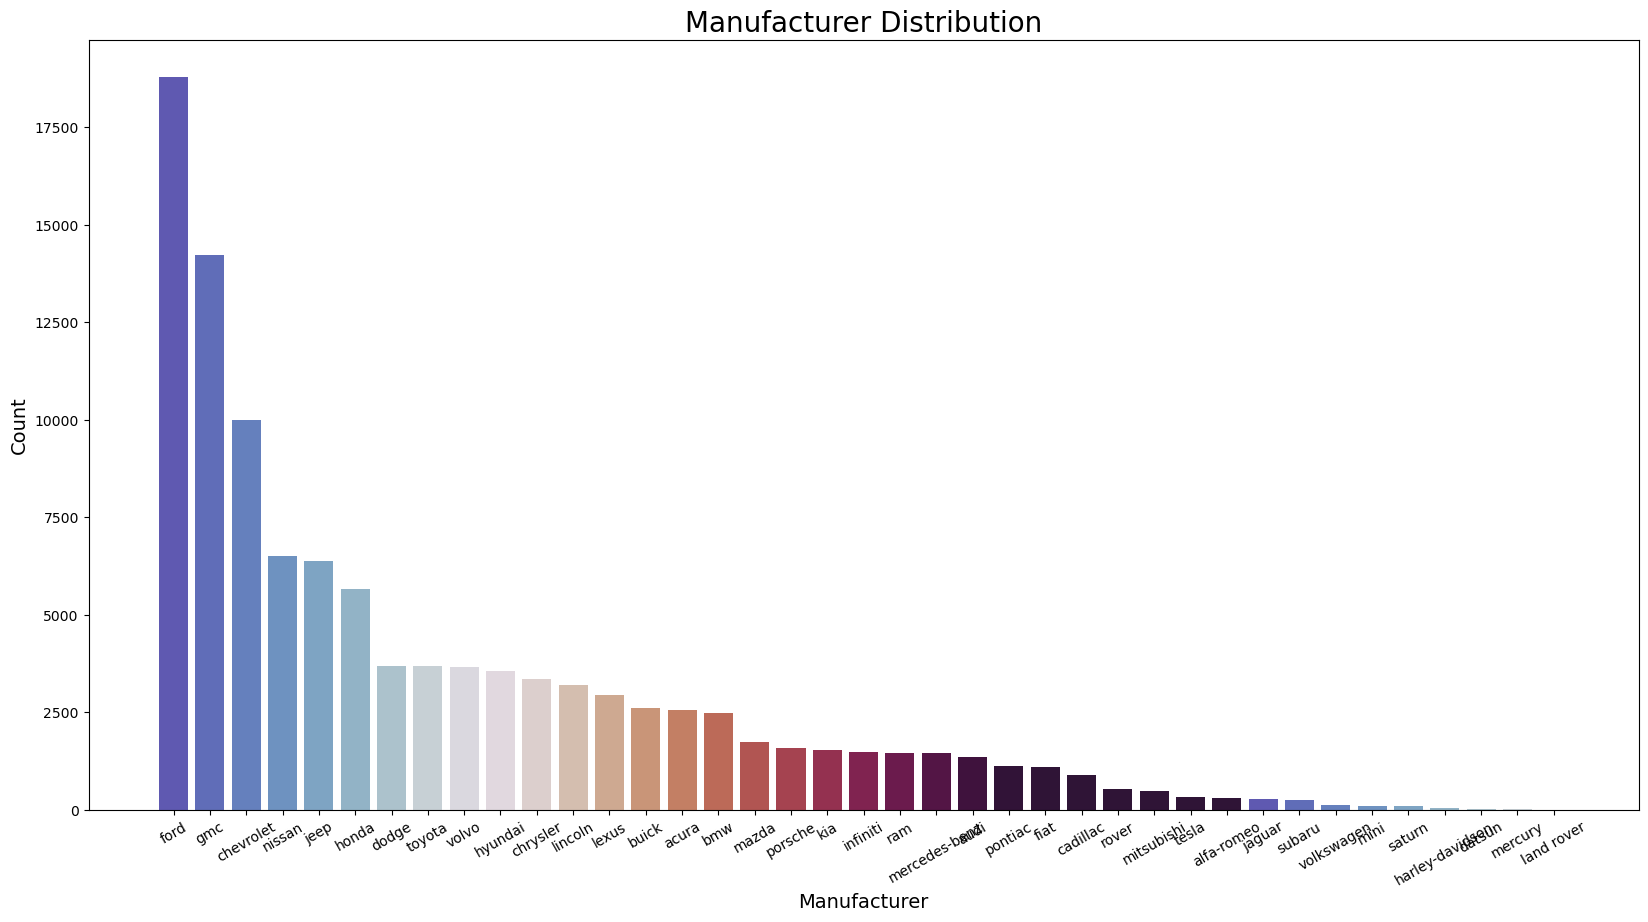

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(20,10))
plt.bar(car_data.manufacturer.unique(), car_data.manufacturer.value_counts(), color = c1)
plt.title('Manufacturer Distribution', fontsize = 20)
plt.xlabel('Manufacturer', fontsize = 14)
plt.xticks(rotation=30)
plt.ylabel('Count', fontsize = 14)
plt.show()
plt.clf()

## *Model*

In [16]:
car_data['model'] = car_data['model'].apply(lambda x: x.split(' ')[0].lower())

***Unique models per manufacturer:***

In [17]:
car_data.groupby('manufacturer').model.nunique()

manufacturer
acura               16
alfa-romeo           1
audi                26
bmw                130
buick               35
cadillac            43
chevrolet          219
chrysler            37
datsun               8
dodge               83
fiat                12
ford               192
gmc                 90
harley-davidson      2
honda               36
hyundai             24
infiniti            49
jaguar              25
jeep                50
kia                 25
land rover           2
lexus               56
lincoln             25
mazda               37
mercedes-benz      140
mercury             23
mini                16
mitsubishi          18
nissan              52
pontiac             30
porsche             17
ram                 51
rover               19
saturn               4
subaru              19
tesla                2
toyota              73
volkswagen          46
volvo               28
Name: model, dtype: int64

##### Large manufacturer unique models:

In [18]:
car_data.loc[car_data['manufacturer']=='ford'].model.unique()

array(['f-150', 'f250', 'f450', 'expedition', 'f150', 'ranger',
       'thunderbird', 'c-max', 'escape', 'mustang', 'f-250', 'edge',
       'transit', 'super', 'econoline', 'f-750', 'e-series', 'f-350',
       'fusion', 'fairlane', 'explorer', 'f550', 'f800', 'flex', 'custom',
       'focus', 'taurus', 'coupe', 'e150', 'f350', 'fiesta', 'ecosport',
       'edgetitanium', 'f100', 'bronco', 'f-550', 'e', 'ranchero',
       'excursion', 't', 'e-450', 'f650', 'f1', 'victoria', 'f750',
       'f-650', 'e250', 'e-250', 'tudor', 'e350', 'f-450', 'anglia',
       'maverick', 'f-100', 'sedan', 'svt', 'ltd', '150', 'crown',
       'galaxie', 'e-350', 't-bucket', 'e450', 'pu', 'f', 'model', 'crew',
       'pickup', 'f-330', 'regency', 'e-150', 'hotrod', 'ei', 'a', '68',
       't-bird', 'falcon', 'c', 'superduty', 'aerostar', 'lcf', 'esape',
       'cmax', 'utility', 'standard', 'xlt', 'fles', 'f250hd', 'f-1',
       'truck', 'deluxe', '750', 'customline', 'f360', 'freestar',
       'expadition',

In [19]:
car_data.loc[car_data['manufacturer']=='chevrolet'].model.unique()

array(['colorado', 'silverado', 'bel', 'trax', 'malibu', 'camaro',
       'sonic', 'express', '3500', 'cc4500', 'tahoe', 'equinox', 'ssr',
       'traverse', 'aero', 'impala', 'c20', '210', 'cruze', 'c10',
       'corvette', 'avalanche', 'elcamino', 'suburban', '1500', 'caprice',
       'k-10', 'trailblazer', 'el', 'spark', 'bolt', 'astro', 'hhr',
       'volt', 'g30', 'coupe', 'k5', 's-10', 'chevelle', 'gmt-400',
       'captiva', 'blazer', 'nova', 'ambulance', 'k10', 'c-10', 'c7500',
       'c6500', 'ii', 'scottsdale', 'brookwood', 'c5500', 'coe', 'wagon',
       'camero', '2500', '3500hd', 'deluxe', 'corvair', 'w4500', 's10',
       '3100', 'conversion', 'k', 'custom', 'master', '2500hd', 'w5500',
       'vega', 'city', 'k20', 'c/k20', 'monte', 'roadster', '1-ton',
       'styleline', 'cheyenne', 'c5', 'k3500', 'sport', 'biscayne',
       'uplander', 'tracker', 'sedan', 'cruze,', 'malibu,', 'k1500',
       'utility', 'business', 'pickup', 'k30', 'station', 'awd', 'death',
       'c-

#### Conclusion

There are a lot of different models which would make it hard to OHE them for example.

Possible solutions:

- Many of the models are the same with spelling errors, these could be labeled under the same name with their respective special versions:
    * examples in the ford models: f150, f-150, f/150, f150xlt
- As seen in the chevrolet models there are in fact many unique models and not many to be put togheter without comprehensive research in what type of models have the same attributes.
- Target encoding could still be used as it only takes into account the average price for that model.

As the model feature does have some issues:

- Misspelling
- Lack of models ( Predicting the price of a certain model would require the training data to contain that model )
- Large quantity of unique values ( There are still a lot of them and adding more would make the computing even more intensive )

For these reasons the models won't be used for this project.

Note: Predicting a car from a certain manufacturer with it's type of vehicle should compensate. Example: Ford Pickup instead of ford f-150

In [20]:
car_data.drop(columns='model', inplace=True)

## *Type*

As seen below, the different car type categories vary a lot in price making type a good feature for price estimation.

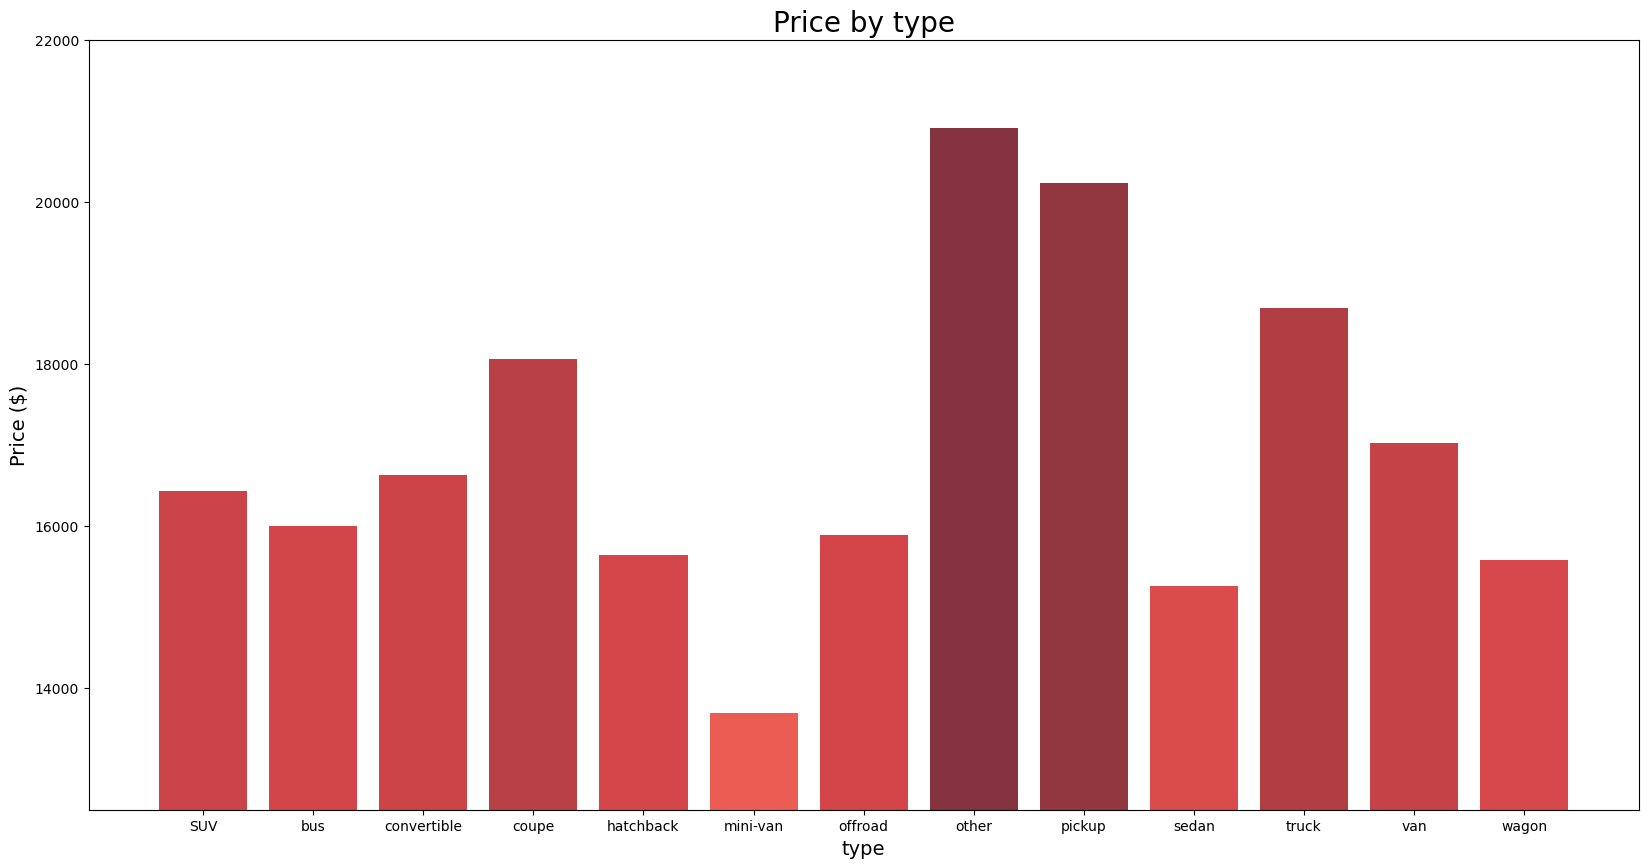

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(20,10))
cmap = plt.cm.get_cmap('Reds')
plt.bar(['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'], car_data.groupby('type').price.mean(),color=cmap(car_data.groupby('type').price.mean()/max(car_data.groupby('type').price.mean())), alpha=0.8)
plt.title('Price by type', fontsize = 20)
plt.ylabel('Price ($)', fontsize = 14)
plt.xlabel('type', fontsize = 14)
plt.ylim(12500, 22000)
plt.show()
plt.clf()

## *Drive*

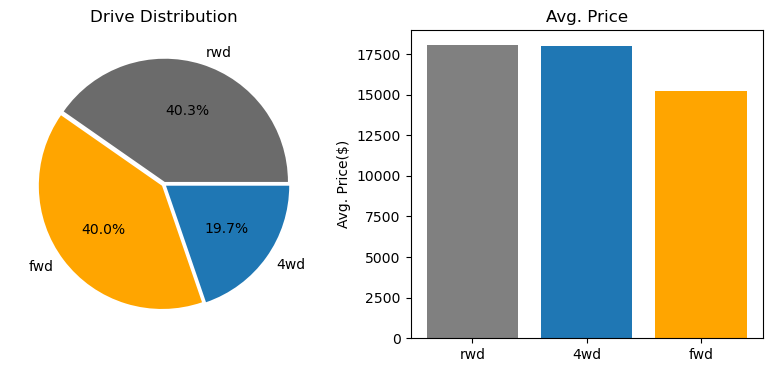

In [22]:
drive_counts = car_data.drive.value_counts(normalize=True)
labels = ['rwd', 'fwd', '4wd']
triop = ['grey', '#1f77b4', 'orange']
trio = ['#6b6b6b', '#ffa500', '#1f77b4']
explode = [0.02, 0.02, 0.02]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].pie(drive_counts, labels=labels, colors=trio, explode=explode, autopct='%1.1f%%')
axs[0].set_title('Drive Distribution')

drive_price = car_data.groupby(car_data['drive']).price.mean()
sorted_drive_price = drive_price.sort_values(ascending=False)

axs[1].bar(sorted_drive_price.index, sorted_drive_price.values, color = triop)
axs[1].set_title('Avg. Price')
axs[1].set_ylabel('Avg. Price($)')
plt.show()

#### Conclusion

Since *rwd* and *4wd* both have the same avg. price the **drive** column will be replaced by a **is fwd** column which will tell wheter or not the car is front wheel driven.

In [23]:
car_data['is_fwd'] = car_data['drive'].apply(lambda x: 1 if x=='fwd' else 0)
car_data.drop(columns='drive', inplace=True)

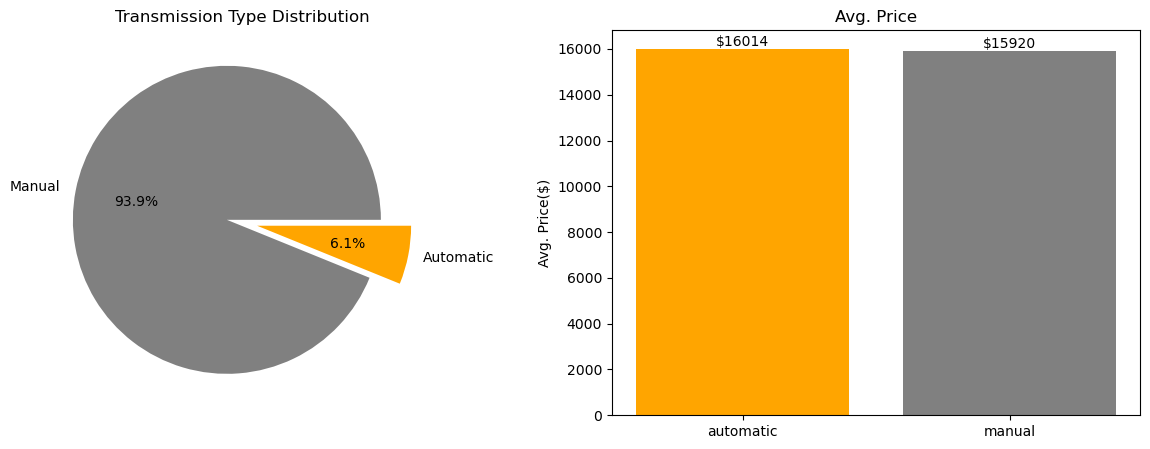

Manual transmission mean price: $15920
Automatic transmission mean price: $16014


In [24]:
gear_counts = car_data.loc[car_data.transmission != 'other'].transmission.value_counts(normalize=True)
labels = ['Manual', 'Automatic']

explode = [0.1, 0.1]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs[0].pie(gear_counts, labels=['Manual', 'Automatic'], colors=b2, explode=explode, autopct='%1.1f%%')
axs[0].set_title('Transmission Type Distribution')

gear_price = car_data.groupby(car_data.loc[car_data.transmission != 'other']['transmission']).price.mean()
sorted_gear_price = gear_price.sort_values(ascending=False)

# create bar plot
axs[1].bar(sorted_gear_price.index.astype(str), sorted_gear_price.values, color = b1)

# add value labels to the bars
for i, v in enumerate(sorted_gear_price.values):
    axs[1].text(i, v, '${:.0f}'.format(v), ha='center', va='bottom')

axs[1].set_title('Avg. Price')
axs[1].set_ylabel('Avg. Price($)')

plt.show()

manual_price = car_data.loc[car_data.transmission == 'manual', 'price'].mean()
auto_price = car_data.loc[car_data.transmission == 'automatic', 'price'].mean()

print('Manual transmission mean price: $' + str(int(manual_price)))
print(f'Automatic transmission mean price: $' + str(int(auto_price)))

#### Conclusion

Since they both avg. to about the same and Manual cars are overrepresented anyway, this column will be dropped entirely.

In [25]:
car_data.drop(columns='transmission', inplace=True)

## *Fuel*

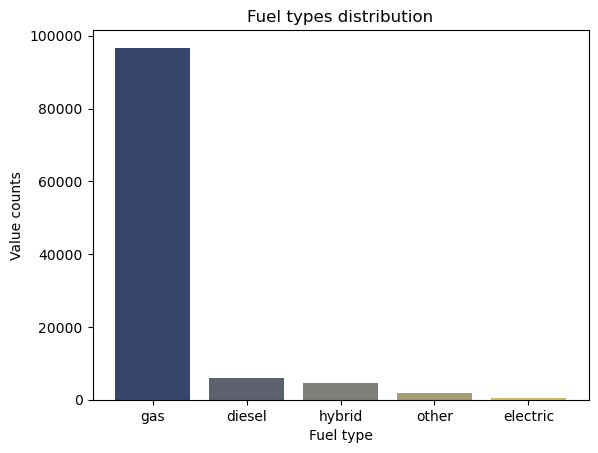

In [26]:
plt.bar(car_data.fuel.unique(), car_data.fuel.value_counts(), color=n1)
plt.title('Fuel types distribution')
plt.xlabel('Fuel type')
plt.ylabel('Value counts')
plt.show()

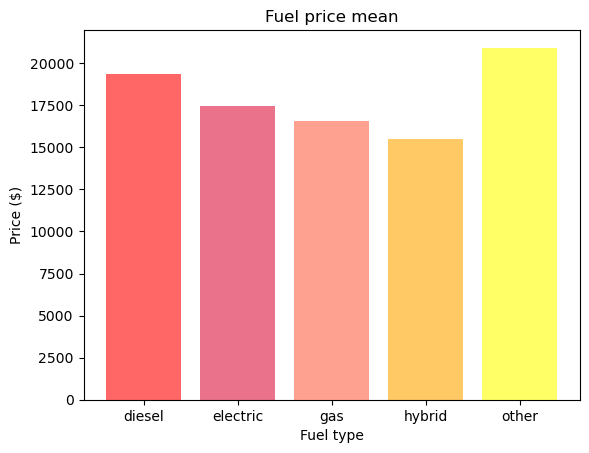

In [27]:
plt.bar(['diesel', 'electric', 'gas', 'hybrid', 'other'], car_data.groupby('fuel').price.mean(), color=['red', 'crimson', 'tomato', 'orange', 'yellow'], alpha=0.6)
plt.title('Fuel price mean')
plt.xlabel('Fuel type')
plt.ylabel('Price ($)')
plt.show()
car_data.groupby('fuel').price.mean()
alpha=0.6

In [28]:
car_data.loc[car_data['fuel']=='electric'].tail(5)

,price,year,manufacturer,fuel,odometer,type,paint_color,lat,long,is_fwd
108307,9990,2013.0,nissan,electric,57268.0,hatchback,black,43.070000,-89.380000,1
108982,18995,2017.0,chevrolet,electric,28805.0,hatchback,grey,43.302071,-88.376508,1
109001,12590,2015.0,chevrolet,electric,35736.0,hatchback,silver,43.060000,-87.960000,1
109411,14590,2016.0,ford,electric,17358.0,hatchback,white,44.960000,-89.640000,1
109625,14990,2015.0,nissan,electric,26816.0,hatchback,white,33.786500,-84.445400,1


#### Conclusion

The price varies quite a bit betweem prices and although the vast majority of the cars are gas driven, these will be left in to have the little impact it may have.

## *Paint Color*

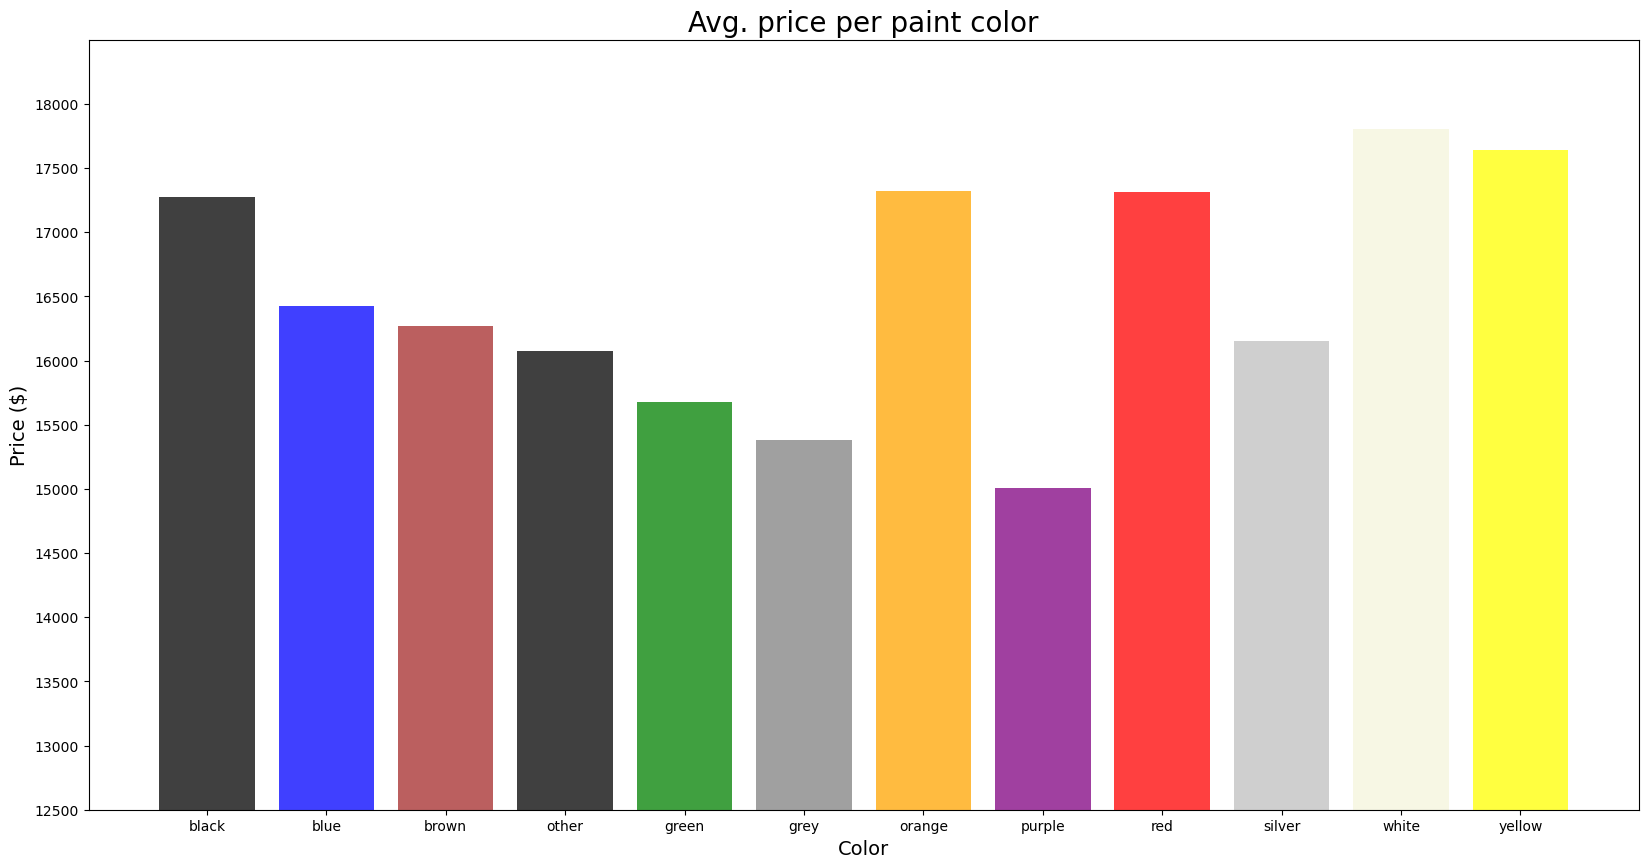

In [29]:
plt.figure(figsize=(20,10))
plt.bar(['black', 'blue', 'brown', 'other', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'white', 'yellow'], 
        car_data.groupby('paint_color').price.mean(),
        color = ['black', 'blue', 'brown', 'none', 'green', 'grey', 'orange', 'purple', 'red', 'silver', 'beige', 'yellow'],
        alpha = 0.75
       )
plt.title('Avg. price per paint color', fontsize = 20)
plt.xlabel('Color', fontsize = 14)
plt.ylim(12500, 18500)
plt.yticks(np.arange(12500, 18500, 500))
plt.ylabel('Price ($)', fontsize = 14)
plt.show()

#
# **Numerical Columns**
**___________________________________________________________________________________________________________________________**
## *Year*

In [30]:
print("Number of instances that are from 2000 and earlier:", (len(car_data.loc[car_data['year']<=2000])))
print("Number of instances that are from 2021 and later:", (len(car_data.loc[car_data['year']>=2021])))

Number of instances that are from 2000 and earlier: 4981
Number of instances that are from 2021 and later: 128


After looking at the data I came to the following realization:

- The data has a small amount of instances from 2000 and earlier.
- The data doesn't contain a lot of cars produced after 2021.

Both come quite naturally since pre-2000 cars are getting old and post 2020 cars are, in most cases, as good as new.

The cars not produced between 2000 and 2021 will therefore be removed.

In [31]:
car_data = car_data.loc[car_data['year']>=2001]
car_data = car_data.loc[car_data['year']<=2020]

In [32]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104541 entries, 0 to 109649
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         104541 non-null  int64  
 1   year          104541 non-null  float64
 2   manufacturer  104541 non-null  string 
 3   fuel          104541 non-null  string 
 4   odometer      104541 non-null  float64
 5   type          104541 non-null  string 
 6   paint_color   104541 non-null  string 
 7   lat           104541 non-null  float64
 8   long          104541 non-null  float64
 9   is_fwd        104541 non-null  int64  
dtypes: float64(4), int64(2), string(4)
memory usage: 8.8 MB


This leaves the data looking as follows:

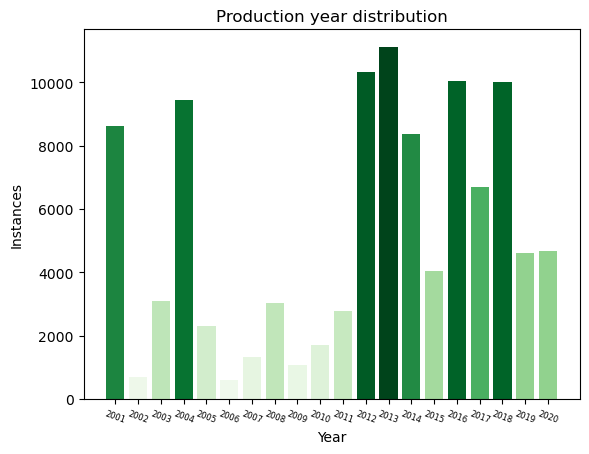

In [33]:
car_data['year'] = car_data.year.astype('int')
cmap = plt.cm.get_cmap('Greens')
bars = plt.bar(car_data.year.unique(), car_data.year.value_counts(), color=cmap(car_data.year.value_counts()/max(car_data.year.value_counts())))
plt.title('Production year distribution')
plt.xlabel('Year')
plt.xticks(np.arange(2001, 2021, step=1), rotation=-20, fontsize=6)
plt.ylabel('Instances')
plt.show()

## *Odometer* (mileage)

In [34]:
print("Cars with mileage above 250,000 miles driven:", len(car_data.loc[car_data['odometer']>250000]))

Cars with mileage above 250,000 miles driven: 749


In [35]:
# removing outliers
car_data = car_data.loc[car_data['odometer']<250000]

In [36]:
def odo_range(df, col_name):
    odo_ranges = np.arange(0, 1000001, 10000)
    def get_odo_range(miles):
        for i in range(len(odo_ranges)-1):
            if odo_ranges[i] <= miles < odo_ranges[i+1]:
                return f"{odo_ranges[i]/1000}k-{odo_ranges[i+1]/1000}k mi."
    
    # Apply the function to the specified column
    odo_range = df[col_name].apply(get_odo_range)
    
    return odo_range

In [37]:
odom = odo_range(car_data, 'odometer')

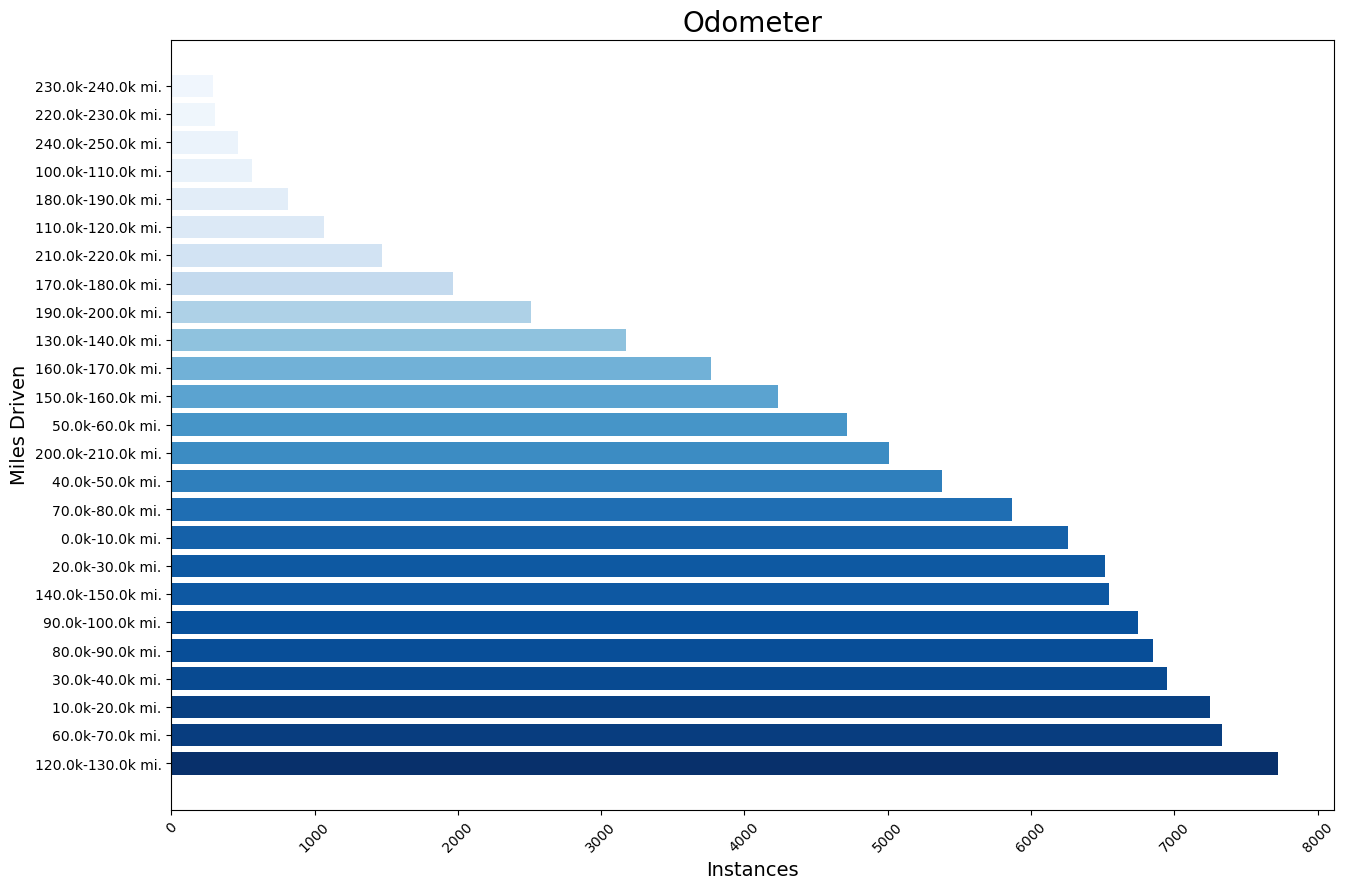

In [38]:
plt.figure(figsize=(15,10))
cmap = plt.cm.get_cmap('Blues')
plt.barh(odom.unique(), odom.value_counts(), color = cmap(odom.value_counts()/max(odom.value_counts())))
plt.xticks(rotation=45)
plt.title('Odometer', fontsize=20)
plt.xlabel('Instances', fontsize=14)
plt.ylabel('Miles Driven', fontsize=14)
plt.show()

In [39]:
odometer = car_data['odometer']
print("Summary statistics for the 'odometer' column:")
print(f"Mean: {odometer.mean():,.0f} miles")
print(f"Standard deviation: {odometer.std():,.0f} miles")
print(f"Minimum value: {odometer.min():,.0f} miles")
print(f"25th percentile: {np.percentile(odometer, 25):,.0f} miles")
print(f"Median: {np.median(odometer):,.0f} miles")
print(f"75th percentile: {np.percentile(odometer, 75):,.0f} miles")
print(f"Maximum value: {odometer.max():,.0f} miles")

Summary statistics for the 'odometer' column:
Mean: 87,885 miles
Standard deviation: 51,221 miles
Minimum value: 0 miles
25th percentile: 45,279 miles
Median: 85,310 miles
75th percentile: 122,172 miles
Maximum value: 249,899 miles


## Correlation Matrix for Numerical Columns:

In [40]:
corr = car_data.drop(columns='is_fwd').corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\jonne\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,price,year,odometer,lat,long
price,1.00,0.43,-0.42,-0.02,-0.04
year,0.43,1.00,-0.59,-0.04,0.01
odometer,-0.42,-0.59,1.00,0.04,0.00
lat,-0.02,-0.04,0.04,1.00,-0.16
long,-0.04,0.01,0.00,-0.16,1.00


# 
# Export
**___________________________________________________________________________________________________________________________**

In [48]:
car_data.to_csv("datasets/car_data.csv")

In [41]:
encoded = pd.get_dummies(car_data, columns=['manufacturer', 'fuel', 'type', 'paint_color'])

#### A look at the encoded dataset:

In [42]:
encoded.head()

,price,year,odometer,lat,long,is_fwd,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,15000,2013,128000.0,32.5920,-85.5189,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27990,2012,68696.0,32.5900,-85.4800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29990,2016,17302.0,32.5900,-85.4800,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27990,2018,37332.0,32.5900,-85.4800,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19900,2004,88000.0,32.5475,-85.4682,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print("One hot encoding the categorical columns leaves us with", encoded.columns.nunique(), "columns.")
print("These are:\n")
for i in encoded.columns:
    print(i)

One hot encoding the categorical columns leaves us with 74 columns.
These are:

price
year
odometer
lat
long
is_fwd
manufacturer_acura
manufacturer_alfa-romeo
manufacturer_audi
manufacturer_bmw
manufacturer_buick
manufacturer_cadillac
manufacturer_chevrolet
manufacturer_chrysler
manufacturer_dodge
manufacturer_fiat
manufacturer_ford
manufacturer_gmc
manufacturer_harley-davidson
manufacturer_honda
manufacturer_hyundai
manufacturer_infiniti
manufacturer_jaguar
manufacturer_jeep
manufacturer_kia
manufacturer_land rover
manufacturer_lexus
manufacturer_lincoln
manufacturer_mazda
manufacturer_mercedes-benz
manufacturer_mercury
manufacturer_mini
manufacturer_mitsubishi
manufacturer_nissan
manufacturer_pontiac
manufacturer_porsche
manufacturer_ram
manufacturer_rover
manufacturer_saturn
manufacturer_subaru
manufacturer_tesla
manufacturer_toyota
manufacturer_volkswagen
manufacturer_volvo
fuel_diesel
fuel_electric
fuel_gas
fuel_hybrid
fuel_other
type_SUV
type_bus
type_convertible
type_coupe
type_